<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 6: Optimization and learning 
**Nolwenn Deschand**

# **Abstract**

In this lab we will implement the gradient descent method in $R^n$.

#**About the code**

In [ ]:
"""This program is a lab report using the provided template"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# written by Nolwenn Deschand (deschand@kth.se)
# Template by Johan Hoffman


'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [2]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from scipy import optimize
import math
import random

from matplotlib import pyplot as plt
from matplotlib import cm


# **Introduction**


The gradient descent (also called steepest descent) method is an optimization algorithm that finds a critical point of an objective function f(x), by searching for the next iterate in the direction opposite the gradient of the objective function.
Gradient descent is commonly-used to train machine learning models and neural networks. In this lab we will implement the gradient descent method in $R^n$.

---

The formulas and algorithms used in this lab come from the chapters 15 and 16 of the book *Methods in Computational Science*, from Johan Hoffman.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)



# **Method**

**Implementation of the Gradient descent method in Rn**


From the book equation (15.4), the approxiamtion at iteration k+1 is given by $x^{(k+1)} = x^{(k)} − α^{(k)}-∇f(x^{(k)})$ where f is the objective function.

The choice of step length $α^{(k)}$ is important for the covergence. If the step size is too large, we may never converge to a local minimum because we overshoot it every time, but if it is too small, the convergence will take longer. 
A way to deal with that would be to use an adaptive step length method, for example using an iterative line search method. 
However, for our simple case, a fix step length would be enough, therefore we will use a fix step length of 0,01.

The implementation is based on the algorithm 15.1 from the book: 
```
ALGORITHM 15.1. x = gradient_descent_method(f, x0). 
Input: objective function f and initial guess x0.
Output: solution vector x.
1: x[:]=x0[:]
2: Df=compute_gradient(f,x)
3: while norm (Df) > TOL do
4:     Df = compute_gradient(f, x)
5:     alpha = line_search(f, x) 
6:     x[:] = x[:] - alpha*Df
7: endwhile
8: return x
```

Our function will take as input the objective function x and an initial guess x0, and the output will be the stationary point $x^*$ such that $||∇(f)(x^*) || < TOL$

In [1]:
def compute_gradient(f, x):
  h = 10**(-8)
  n = x.shape[0]
  grad = np.zeros((n))
  for i in range(n):
    tmp1 = x.copy()
    tmp2 = x.copy()
    tmp1[i]+=h
    tmp2[i]-=h
    grad [i] = (f(tmp1) - f(tmp2)) / (2 * h)
  return grad


def gradient_descent_method(f, x0):
  x = x0
  Df=compute_gradient(f,x)
  alpha = 0.01
  steps = []
  steps.append(x)
  while np.linalg.norm(Df) > 0.0001:
    Df = compute_gradient(f, x)
    x = x - alpha*Df
    steps.append(x)
  return x, steps


# **Results**

**Implementation of the Gradient descent method in Rn**

To test the implementation, we will first compare the approximated solution to the exact solution and then plot the values of the iterative approximations x.

We will test our implementation for different initial values.

Approximated solution for x0 = [-4.0, 4.0]:  [ 2.         -0.99995113]
Approximated solution for x0 = [6.5, 7.0]:  [ 2.         -0.99995185]
Exact solution: [2,-1]


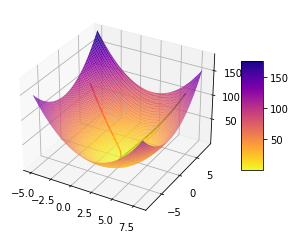

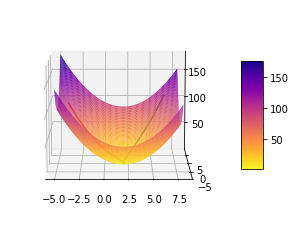

In [5]:
def f(x):
  return 2*(x[0]-2)**2 + (x[1]+1)**2 + 0.8


x0 = np.array([-4.0, 4.0])
x0_2 = np.array([6.5, 7.0])

x_approx,steps = gradient_descent_method(f,x0)
x_approx_2,steps_2 = gradient_descent_method(f,x0_2)

print ("Approximated solution for x0 = [-4.0, 4.0]: ",x_approx)
print ("Approximated solution for x0 = [6.5, 7.0]: ",x_approx_2)
print ("Exact solution: [2,-1]")

@np.vectorize
def func(x,y):
  return 2*(x-2)**2 + (y+1)**2 + 0.8

# PLOT 1:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Pts on surf
Ah = np.vstack(steps)
xp = Ah[:,0]
yp = Ah[:,1]
zp = func(xp,yp)
ax.plot(xp, yp, zp, 'r', alpha=1)

Ah_2 = np.vstack(steps_2)
xp_2 = Ah_2[:,0]
yp_2 = Ah_2[:,1]
zp_2 = func(xp_2,yp_2)
ax.plot(xp_2, yp_2, zp_2, 'g', alpha=1)

# Surf
x = np.linspace(-5,8,100)
y = np.linspace(-8,8,100)
X,Y = np.meshgrid(x, y)
z=np.zeros((2,1))
X = X.T
Y = Y.T

Z = func(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.plasma_r, edgecolor='none')

fig.colorbar(surf, shrink=0.5, aspect=5)

# PLOT 2:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Pts on surf
ax.plot(xp, yp, zp, 'r', alpha=1)
ax.plot(xp_2, yp_2, zp_2, 'g', alpha=1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.plasma_r, edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(10, -90)

plt.show()



First, we observe that the approximated solution is in both case really close to the exact solution, according to the treshold of 0.0001 chosen here. 

On the plots, we can see the surface which is computed from the objective function. The red curve is the x points when we chose $x_0 = [-4.0, 4.0]$ and the green curve for $x_0 = [6.5, 7.0]$. The curves go pretty straight to the exact solution, which is a behaviour that we expect for the gradient descent.

# **Discussion**

Finally, we have a working implementation of the gradient descent in $R^n$. We could improve the efficiency of the implementation by using an adaptive step length. It was interesting to implement the gradient descent ourselves, it helps the understanding. 